In [110]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/moo/Desktop/MSc Business Analytics/BEMM466 Business project/Temporal Trend Finalised/arxiv_ai_with_original_and_reduced_topics_labeled.csv")
df.head(10)

,authors,categories,comment,doi,entry_id,journal_ref,pdf_url,primary_category,published,summary,...,n_authors,summary_clean,abstract_len_words_clean,original_topic,original_topic_prob,original_topic_label,reduced_topic,reduced_topic_prob,reduced_topic_label,validated_topic
0,"[arxiv.Result.Author('Christoph Benzmueller'),...","['cs.AI', 'cs.LO', '03B60, 03B15, 68T27, 68T30...",This work has been presented at the conference...,NaN,http://arxiv.org/abs/1204.5920v1,NaN,http://arxiv.org/pdf/1204.5920v1,cs.AI,2012-04-26 13:51:09+00:00,A semantic embedding of (constant domain) quan...,...,2,semantic embedding constant domain quantified ...,11,-1,0.400597,Noise / Outlier,-1,0.623030,Noise / Outlier,NaN
1,"[arxiv.Result.Author('Lorenzo Piazzo'), arxiv....",['cs.AI'],"32 pages, 1 figure",NaN,http://arxiv.org/abs/2111.01016v1,NaN,http://arxiv.org/pdf/2111.01016v1,cs.AI,2021-11-01 15:21:26+00:00,"Gomoku, also known as five in a row, is a clas...",...,3,gomoku known five row classical board game ide...,56,-1,0.101428,Noise / Outlier,-1,0.248777,Noise / Outlier,NaN
2,"[arxiv.Result.Author('Ana Lucic'), arxiv.Resul...",['cs.AI'],Accepted to the AAAI Symposium on Educational ...,NaN,http://arxiv.org/abs/2111.00826v4,NaN,http://arxiv.org/pdf/2111.00826v4,cs.AI,2021-11-01 10:58:35+00:00,"In this work, we explain the setup for a techn...",...,5,work explain setup technical graduatelevel cou...,92,-1,0.228952,Noise / Outlier,-1,0.770418,Noise / Outlier,NaN
3,"[arxiv.Result.Author('Adrian Haret'), arxiv.Re...",['cs.AI'],NaN,NaN,http://arxiv.org/abs/1603.09511v1,NaN,http://arxiv.org/pdf/1603.09511v1,cs.AI,2016-03-31 09:59:02+00:00,Understanding the behavior of belief change op...,...,3,understanding behavior belief change operator ...,93,-1,0.279455,Noise / Outlier,-1,0.418049,Noise / Outlier,NaN
4,"[arxiv.Result.Author('Yu Liu'), arxiv.Result.A...",['cs.AI'],NaN,NaN,http://arxiv.org/abs/2111.00787v1,NaN,http://arxiv.org/pdf/2111.00787v1,cs.AI,2021-11-01 09:36:38+00:00,Site selection determines optimal locations fo...,...,3,site selection determines optimal location new...,109,-1,0.407718,Noise / Outlier,-1,0.770656,Noise / Outlier,NaN
5,"[arxiv.Result.Author('Ryuta Arisaka'), arxiv.R...",['cs.AI'],NaN,NaN,http://arxiv.org/abs/1605.00495v2,NaN,http://arxiv.org/pdf/1605.00495v2,cs.AI,2016-05-02 14:08:23+00:00,We consider abstract-argumentation-theoretic c...,...,2,consider abstractargumentationtheoretic coalit...,97,-1,0.001378,Noise / Outlier,-1,0.010017,Noise / Outlier,NaN
6,"[arxiv.Result.Author('Ramya Bygari'), arxiv.Re...",['cs.AI'],"9 pages, 10 figures, Accepted at IEEE Big Data...",NaN,http://arxiv.org/abs/2111.00783v1,NaN,http://arxiv.org/pdf/2111.00783v1,cs.AI,2021-11-01 09:33:02+00:00,"In the current era of digitization, online pay...",...,5,current era digitization online payment system...,172,-1,0.054000,Noise / Outlier,-1,0.062255,Noise / Outlier,NaN
7,"[arxiv.Result.Author('Mrinal Rawat'), arxiv.Re...",['cs.AI'],NaN,NaN,http://arxiv.org/abs/2111.00506v1,NaN,http://arxiv.org/pdf/2111.00506v1,cs.AI,2021-10-31 14:02:26+00:00,While Out-of-distribution (OOD) detection has ...,...,3,outofdistribution ood detection well explored ...,104,-1,0.003600,Noise / Outlier,-1,0.013570,Noise / Outlier,NaN
8,[arxiv.Result.Author('Paolo Liberatore')],['cs.AI'],NaN,10.1613/jair.1.11238,http://arxiv.org/abs/1605.02160v1,NaN,http://arxiv.org/pdf/1605.02160v1,cs.AI,2016-05-07 09:09:08+00:00,Merging beliefs requires the plausibility of t...,...,1,merging belief requires plausibility source in...,96,-1,0.308119,Noise / Outlier,-1,0.389385,Noise / Outlier,NaN
9,"[arxiv.Result.Author('Deliang Wang'), arxiv.Re...",['cs.AI'],This paper has been accepted and presented in ...,NaN,http://arxiv.org/abs/2111.00419v1,NaN,http://arxiv.org/pdf/2111.00419v1,cs.AI,2021-10-31 07:18:59+00:00,With more deep learning techniques being intro...,...,4,deep learning technique introduced knowledge t...,52,-1,0.015203,Noise / Outlier,-1,0.074580,Noise / Outlier,NaN


In [112]:
# Save original topic counts BEFORE any cleaning
topic_counts_full = df['reduced_topic'].value_counts()
topic_counts_full

reduced_topic
-1     3346
 0     1494
 1      923
 2      808
 3      762
 4      570
 5      455
 6      308
 7      299
 8      220
 9      201
 10      99
 11      96
 12      85
 13      73
 14      67
 15      46
 16      39
 17      37
 18      31
Name: count, dtype: int64

In [114]:
# Count before
print("Before dropping:", len(df))

# Identify duplicates
dup_mask = df.duplicated(subset='summary_clean')
print("Duplicate rows:", dup_mask.sum())

# Identify missing
missing_mask = df['summary_clean'].isna() | df['year'].isna()
print("Missing summary/year rows:", missing_mask.sum())

# Check overlap
both_mask = dup_mask | missing_mask
print("Rows dropped in total:", both_mask.sum())


Before dropping: 9959
Duplicate rows: 14
Missing summary/year rows: 0
Rows dropped in total: 14


In [118]:
duplicates = df[df.duplicated(subset='summary_clean', keep=False)]
duplicates

,authors,categories,comment,doi,entry_id,journal_ref,pdf_url,primary_category,published,summary,...,n_authors,summary_clean,abstract_len_words_clean,original_topic,original_topic_prob,original_topic_label,reduced_topic,reduced_topic_prob,reduced_topic_label,validated_topic
241,"[arxiv.Result.Author('Mihai Boicu'), arxiv.Res...",['cs.AI'],Post-symposium proceedings including 9 papers,NaN,http://arxiv.org/abs/2112.05614v1,NaN,http://arxiv.org/pdf/2112.05614v1,cs.AI,2021-12-10 15:48:31+00:00,Proceedings of the AAAI Fall Symposium on Arti...,...,3,proceeding aaai fall symposium artificial inte...,12,-1,0.000042,Noise / Outlier,-1,0.000331,Noise / Outlier,NaN
1400,"[arxiv.Result.Author('Marco Zaffalon'), arxiv....",['cs.AI'],Appears in Proceedings of the Eighteenth Confe...,NaN,http://arxiv.org/abs/1408.1487v1,NaN,http://arxiv.org/pdf/1408.1487v1,cs.AI,2014-08-07 06:26:42+00:00,Mutual information is widely used in artificia...,...,2,mutual information widely used artificial inte...,91,-1,0.281870,Noise / Outlier,-1,0.544938,Noise / Outlier,NaN
1933,"[arxiv.Result.Author('Frank Stein'), arxiv.Res...",['cs.AI'],Post-symposium proceedings including 13 papers,NaN,http://arxiv.org/abs/2011.04527v2,NaN,http://arxiv.org/pdf/2011.04527v2,cs.AI,2020-11-09 16:08:42+00:00,Proceedings of the AAAI Fall Symposium on Arti...,...,2,proceeding aaai fall symposium artificial inte...,12,-1,0.000042,Noise / Outlier,-1,0.000331,Noise / Outlier,NaN
2105,"[arxiv.Result.Author('Marco Zaffalon'), arxiv....","['cs.AI', 'cs.LG', 'I.2']",8 two-column pages,NaN,http://arxiv.org/abs/cs/0206006v1,Proc. 14th International Conference on Uncerta...,http://arxiv.org/pdf/cs/0206006v1,cs.AI,2002-06-03 16:00:55+00:00,Mutual information is widely used in artificia...,...,2,mutual information widely used artificial inte...,91,-1,0.259827,Noise / Outlier,-1,0.507254,Noise / Outlier,NaN
2688,[arxiv.Result.Author('Vitorino Ramos')],"['cs.AI', 'cs.NE', 'I.2; I.5']","10 pages, 4 figures",NaN,http://arxiv.org/abs/cs/0412081v1,SIARP 2000 - 5th IberoAmerican Symp. on Patter...,http://arxiv.org/pdf/cs/0412081v1,cs.AI,2004-12-17 16:44:54+00:00,"Neoteny, also spelled Paedomorphosis, can be d...",...,1,neoteny spelled paedomorphosis defined biologi...,153,-1,0.183000,Noise / Outlier,-1,0.530996,Noise / Outlier,NaN
2689,[arxiv.Result.Author('Vitorino Ramos')],"['cs.AI', 'cs.NE', 'I.2; I.5']","12 pages, 3 figures, at\n http://alfa.ist.utl...",NaN,http://arxiv.org/abs/cs/0412080v1,"in Applications of Evolutionary Computation, (...",http://arxiv.org/pdf/cs/0412080v1,cs.AI,2004-12-17 16:39:33+00:00,"Neoteny, also spelled Paedomorphosis, can be d...",...,1,neoteny spelled paedomorphosis defined biologi...,153,-1,0.092391,Noise / Outlier,-1,0.268639,Noise / Outlier,NaN
3351,[arxiv.Result.Author('J. Y. Halpern')],['cs.AI'],See http://www.jair.org/ for any accompanying ...,NaN,http://arxiv.org/abs/cs/9707103v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9707103v1,cs.AI,1997-07-01 00:00:00+00:00,Starting with a likelihood or preference order...,...,1,starting likelihood preference order world ext...,62,0,0.806766,probability_probabilistic_belief_theory,0,0.811492,constraint_logic_belief_probability,Applications of Symbolic and Rule-Based AI
3454,[arxiv.Result.Author('Daniel Lehmann')],['cs.AI'],Appears in Proceedings of the Twelfth Conferen...,NaN,http://arxiv.org/abs/1408.1481v1,NaN,http://arxiv.org/pdf/1408.1481v1,cs.AI,2014-08-07 06:23:08+00:00,Preferences among acts are analyzed in the sty...,...,1,preference among act analyzed style savage par...,37,0,0.964590,probability_probabilistic_belief_theory,0,0.972476,constraint_logic_belief_probability,Applications of Symbolic and Rule-Based AI
3582,"[arxiv.Result.Author('Michael Gelfond'), arxiv...",['cs.AI'],arXiv admin note: text overlap with arXiv:1405...,NaN,http://arxiv.org/abs/1808.07050v1,NaN,http://arxiv.org/pdf/1808.07050v1,cs.AI,2018-08-21 04:16:03+00:00,The paper presents a knowledge representation ..

In [104]:
# TEMPORAL TREND ONLY: Clean data for time-based analysis
df = df.drop_duplicates(subset='summary_clean')
df = df.dropna(subset=['summary_clean', 'year'])

In [106]:
df['reduced_topic'].value_counts()

reduced_topic
-1     3343
 0     1487
 1      920
 2      808
 3      762
 4      570
 5      455
 6      308
 7      299
 8      220
 9      201
 10      98
 11      96
 12      85
 13      73
 14      67
 15      46
 16      39
 17      37
 18      31
Name: count, dtype: int64

In [92]:
# Before removing duplicates
initial_count = df.shape[0]

# Drop duplicates based on 'summary_clean'
df_dedup = df.drop_duplicates(subset='summary_clean')

# Check how many were removed
deduped_count = initial_count - df_dedup.shape[0]
print("Number of duplicate rows removed based on 'summary_clean':", deduped_count)

Number of duplicate rows removed based on 'summary_clean': 0


In [14]:
# === Basic EDA ===
total_papers_per_year = df.groupby('year').size()
topic_counts = df['reduced_topic'].value_counts()

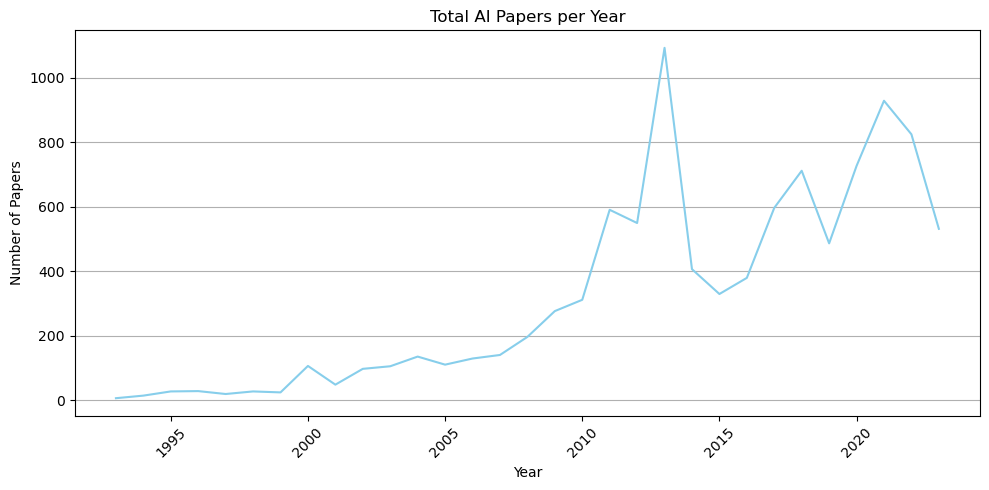

In [18]:
# Plot total papers per year
plt.figure(figsize=(10, 5))
total_papers_per_year.plot(kind='line', color='skyblue')
plt.title("Total AI Papers per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

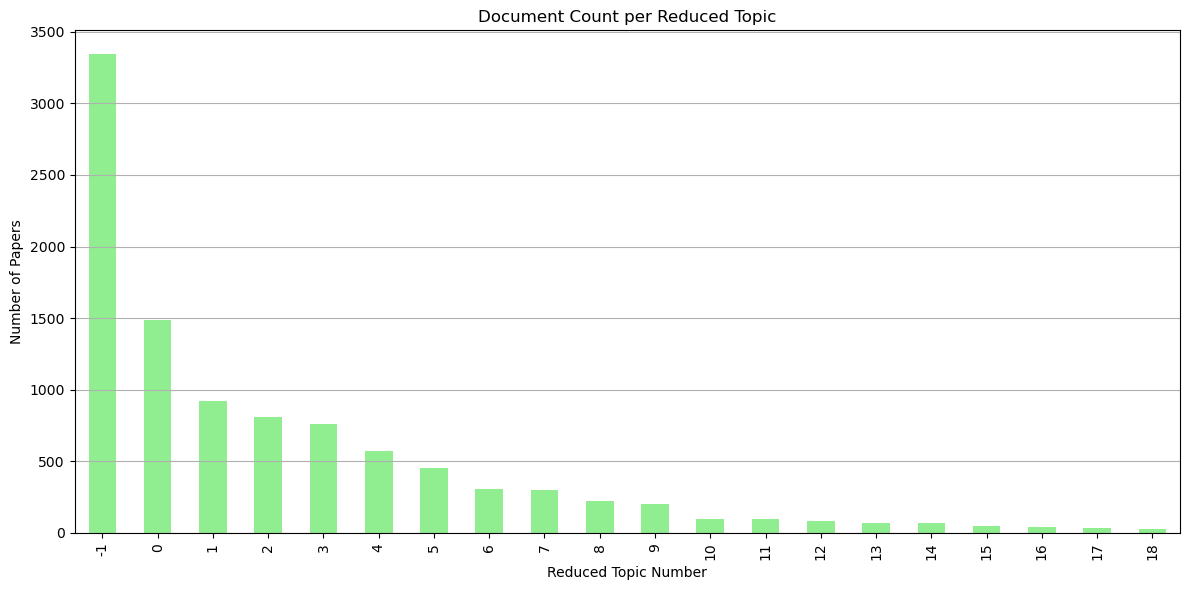

In [22]:
# Plot topic distribution
plt.figure(figsize=(12, 6))
topic_counts.sort_index().plot(kind='bar', color='lightgreen')
plt.title("Document Count per Reduced Topic")
plt.xlabel("Reduced Topic Number")
plt.ylabel("Number of Papers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

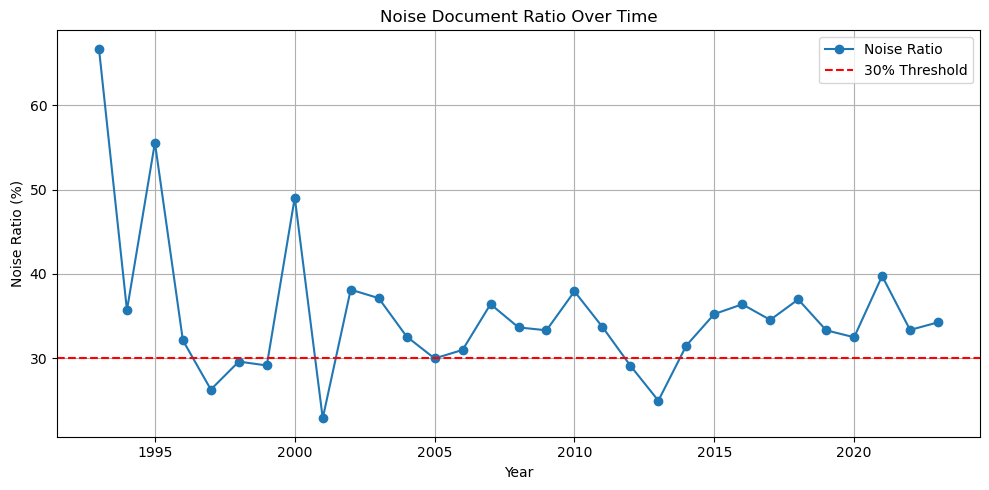

In [34]:
# === Step 3: Noise Ratio Check ===
# Calculate the % of documents assigned to topic -1 (noise) per year
df['is_noise'] = df['reduced_topic'] == -1
noise_ratio_per_year = df.groupby('year')['is_noise'].mean().reset_index()
noise_ratio_per_year.columns = ['year', 'noise_ratio']

# Plot noise ratio trend
plt.figure(figsize=(10, 5))
plt.plot(noise_ratio_per_year['year'], noise_ratio_per_year['noise_ratio'] * 100, marker='o', label='Noise Ratio')
plt.axhline(y=30, color='red', linestyle='--', label='30% Threshold')
plt.title('Noise Document Ratio Over Time')
plt.ylabel('Noise Ratio (%)')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

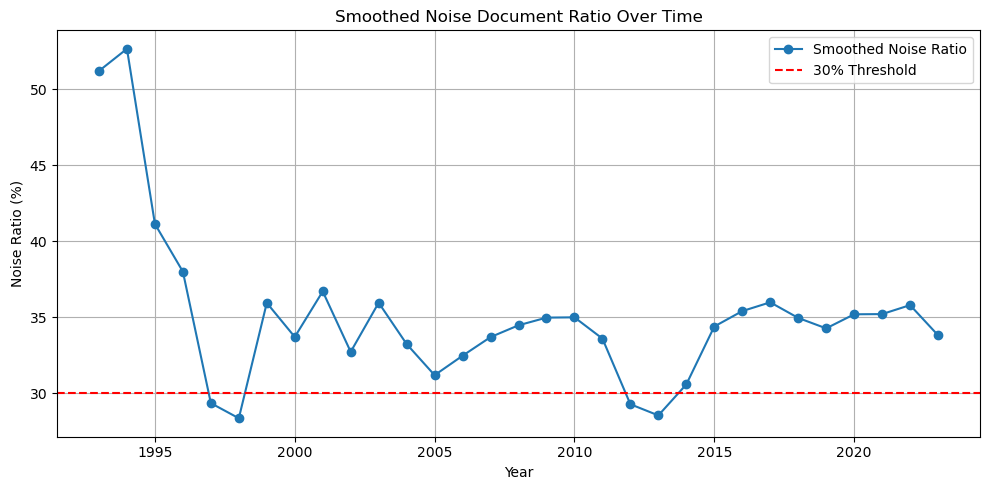

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Noise Ratio Check
df['is_noise'] = df['reduced_topic'] == -1
noise_ratio_per_year = df.groupby('year')['is_noise'].mean().reset_index()
noise_ratio_per_year.columns = ['year', 'noise_ratio']

# Apply 3-year rolling average smoothing
noise_ratio_per_year['smoothed_ratio'] = noise_ratio_per_year['noise_ratio'].rolling(window=3, center=True, min_periods=1).mean()

# Plot the smoothed noise ratio trend
plt.figure(figsize=(10, 5))
plt.plot(noise_ratio_per_year['year'], noise_ratio_per_year['smoothed_ratio'] * 100, marker='o', label='Smoothed Noise Ratio')
plt.axhline(y=30, color='red', linestyle='--', label='30% Threshold')
plt.title('Smoothed Noise Document Ratio Over Time')
plt.ylabel('Noise Ratio (%)')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

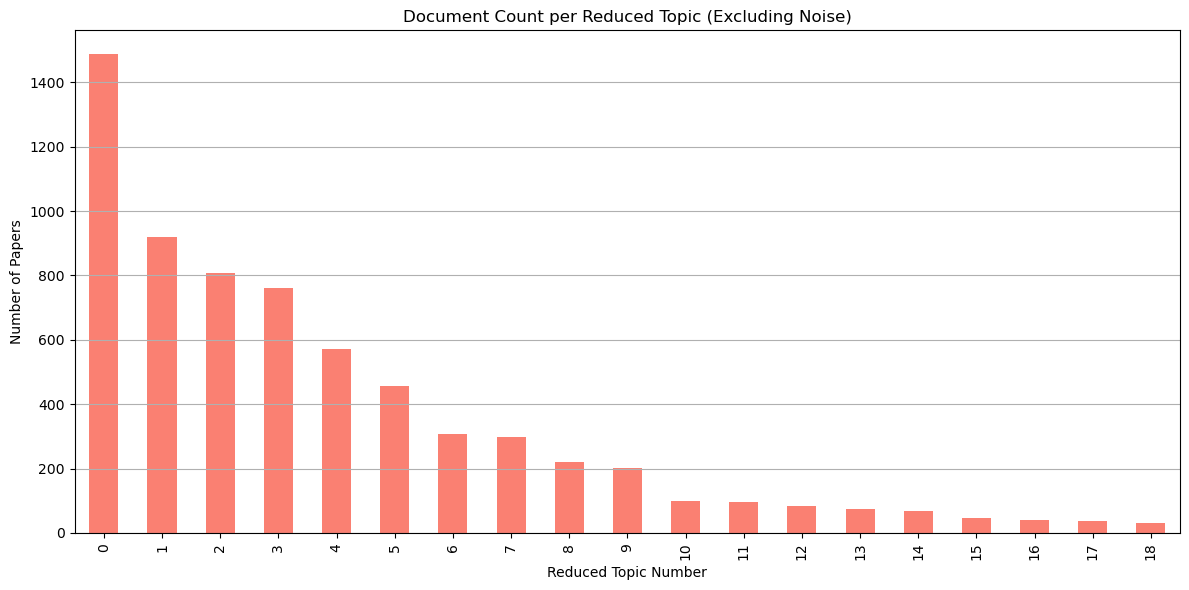

In [38]:
# Exclude topic -1 from the topic count plot
topic_counts_no_noise = topic_counts[topic_counts.index != -1]

# Replot without noise
plt.figure(figsize=(12, 6))
topic_counts_no_noise.sort_index().plot(kind='bar', color='salmon')
plt.title("Document Count per Reduced Topic (Excluding Noise)")
plt.xlabel("Reduced Topic Number")
plt.ylabel("Number of Papers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

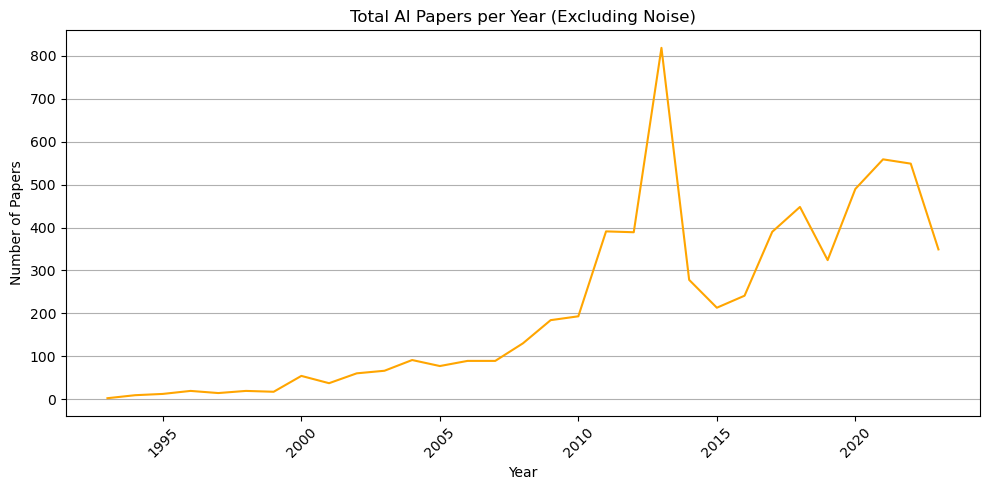

In [28]:
# Filter out noise (topic -1) and recalculate total papers per year
df_no_noise = df[df['reduced_topic'] != -1]
total_papers_per_year_no_noise = df_no_noise.groupby('year').size()

# Plot total papers per year excluding noise
plt.figure(figsize=(10, 5))
total_papers_per_year_no_noise.plot(kind='line', color='orange')
plt.title("Total AI Papers per Year (Excluding Noise)")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [44]:
# Step 4: Create clean working dataset (exclude noise)
df_clean = df[df["reduced_topic"] != -1].copy()

# Step 5: Create pivot table with absolute counts per topic per year
topic_year_counts = df_clean.groupby(["year", "reduced_topic"]).size().unstack(fill_value=0)

In [46]:
# Step 6: Normalize to relative frequencies by dividing by total papers per year
total_per_year = topic_year_counts.sum(axis=1)
relative_freq = topic_year_counts.div(total_per_year, axis=0)

# Step 7: Apply 3-year rolling average smoothing
smoothed_relative_freq = relative_freq.rolling(window=3, min_periods=1, center=True).mean()

In [50]:
print(smoothed_relative_freq.head(10))

reduced_topic        0         1         2         3         4         5   \
year                                                                        
1993           0.305556  0.166667  0.000000  0.111111  0.055556  0.250000   
1994           0.231481  0.250000  0.027778  0.074074  0.064815  0.194444   
1995           0.152534  0.337719  0.027778  0.091618  0.134990  0.027778   
1996           0.186926  0.298037  0.027778  0.065163  0.121763  0.099206   
1997           0.281955  0.246867  0.000000  0.100251  0.093985  0.088972   
1998           0.370706  0.159148  0.019608  0.161138  0.023810  0.088972   
1999           0.502981  0.106238  0.019608  0.181420  0.012346  0.023717   
2000           0.515309  0.036537  0.019608  0.218405  0.021355  0.033200   
2001           0.538839  0.053203  0.011111  0.151084  0.026910  0.044311   
2002           0.511903  0.049836  0.031313  0.128638  0.024666  0.043189   

reduced_topic        6         7         8         9         10   11  \
yea

In [52]:
smoothed_relative_freq.to_csv("smoothed_relative_frequencies.csv")
print("Exported to smoothed_relative_frequencies.csv")

Exported to smoothed_relative_frequencies.csv


In [54]:
print(smoothed_relative_freq.loc[2020].sort_values(ascending=False).head(5))

reduced_topic
1    0.186799
2    0.172081
0    0.142430
3    0.133192
5    0.076875
Name: 2020, dtype: float64


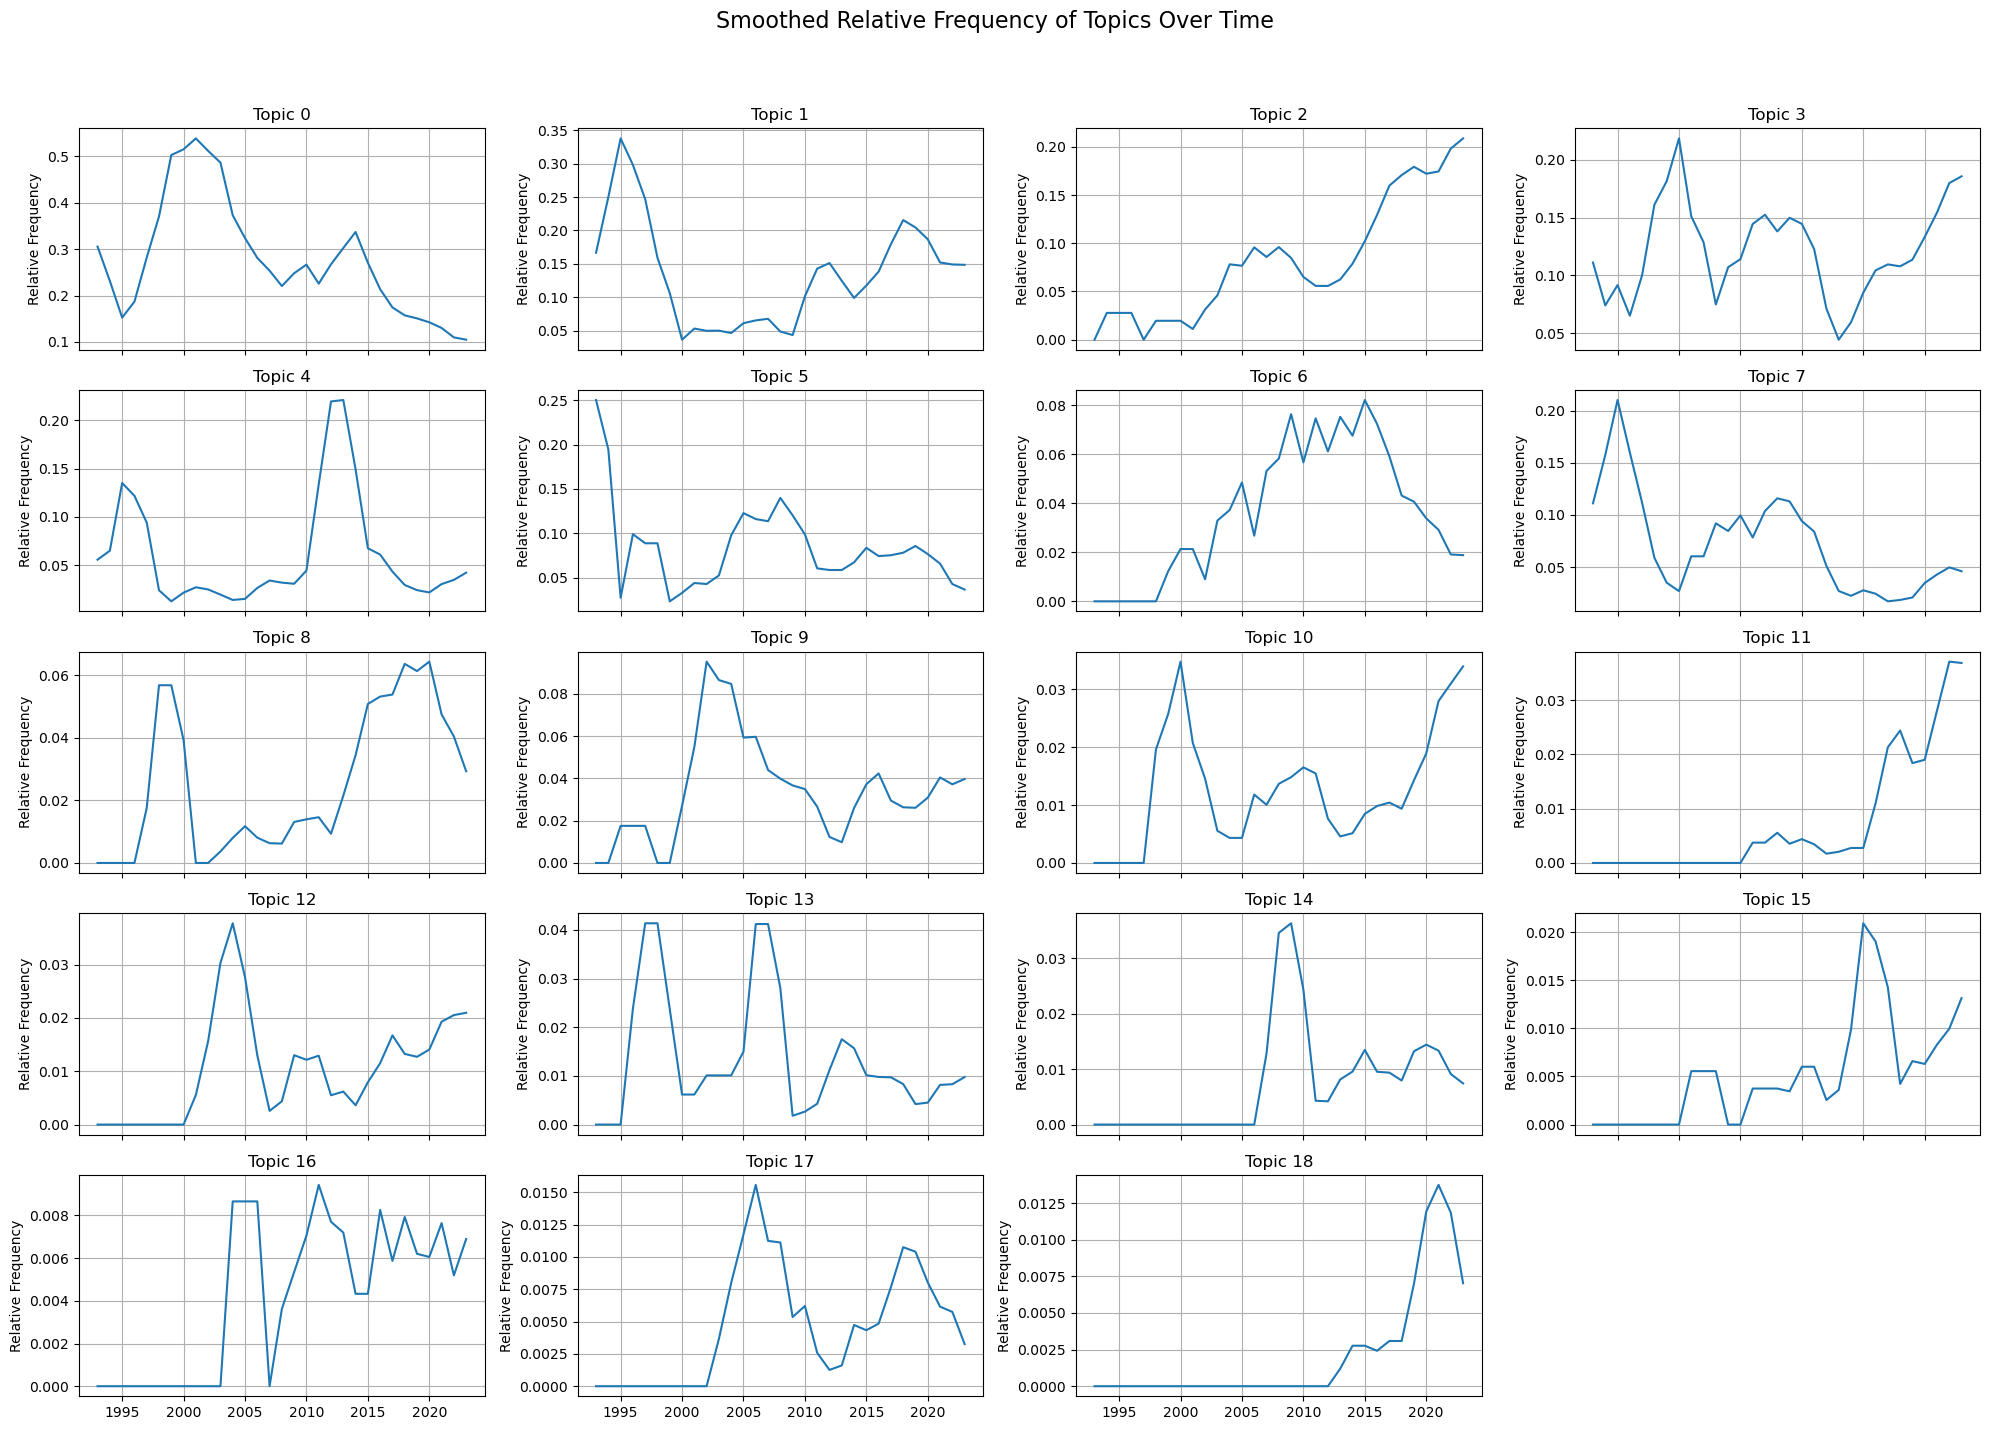

In [56]:
import matplotlib.pyplot as plt

# Define number of topics and layout
topics = smoothed_relative_freq.columns
n_topics = len(topics)
n_cols = 4
n_rows = -(-n_topics // n_cols)  # Ceiling division

# Plot each topic's trend in a separate subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3), sharex=True)
axes = axes.flatten()

for i, topic in enumerate(topics):
    axes[i].plot(smoothed_relative_freq.index, smoothed_relative_freq[topic], label=f"Topic {topic}")
    axes[i].set_title(f"Topic {topic}")
    axes[i].set_ylabel("Relative Frequency")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Smoothed Relative Frequency of Topics Over Time", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

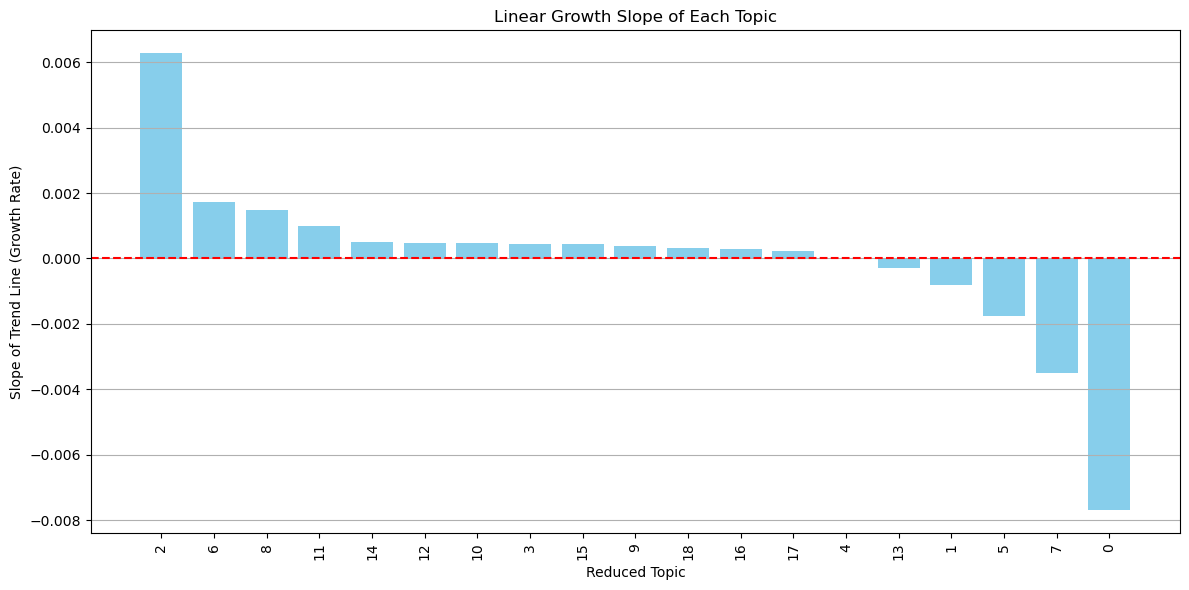

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare a DataFrame to collect slopes
slope_data = []

# Fit linear regression for each topic
for topic in smoothed_relative_freq.columns:
    y = smoothed_relative_freq[topic].dropna().values
    x = smoothed_relative_freq[topic].dropna().index.values.reshape(-1, 1)
    
    if len(x) > 1:
        model = LinearRegression().fit(x, y)
        slope = model.coef_[0]
        slope_data.append((topic, slope))

# Convert to DataFrame and sort
slope_df = pd.DataFrame(slope_data, columns=['topic', 'slope']).sort_values(by='slope', ascending=False)

# Plot as lollipop chart
plt.figure(figsize=(12, 6))
plt.bar(slope_df['topic'].astype(str), slope_df['slope'], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Linear Growth Slope of Each Topic")
plt.xlabel("Reduced Topic")
plt.ylabel("Slope of Trend Line (Growth Rate)")
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [64]:
# Compute total document count per topic (excluding noise)
total_docs_per_topic = df[df["reduced_topic"] != -1]["reduced_topic"].value_counts().sort_index()
total_docs_df = pd.DataFrame({
    "topic": total_docs_per_topic.index,
    "total_papers": total_docs_per_topic.values
})

# Merge slope and total paper count
topic_summary_df = pd.merge(slope_result_df, total_docs_df, on="topic", how="left").fillna(0).astype({"total_papers": int})

topic_summary_df

,topic,slope,total_papers
0,0,-0.007693,1487
1,1,-0.000819,920
2,2,0.006276,808
3,3,0.000457,762
4,4,-0.000025,570
5,5,-0.001751,455
6,6,0.001732,308
7,7,-0.003489,299
8,8,0.001496,220
9,9,0.000384,201


In [76]:
# Save the topic_summary_df (contains slope and total paper count) to CSV
topic_summary_df.to_csv("topic_summary_with_slope_and_volume.csv", index=False)
print("Exported to topic_summary_with_slope_and_volume.csv")

Exported to topic_summary_with_slope_and_volume.csv
